<a href="https://colab.research.google.com/github/LuisDistribuida2023/DeberDistribuida/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# @title Instalación de las librerias o dependencias necesarias
!pip install beautifulsoup4 requests pandas

In [9]:
# @title Load dependencies
import json # modulo para trabajar con archivos JSON
import requests # libreria para hacer peticiones HTTP
import pandas as pd # libreria para procesar datos, proporciona funciones para analíticas
from bs4 import BeautifulSoup as bs # Extraer información de paginas web

In [10]:
# @title Función que convierte una lista de elementos en un dataframe de pandas
def rowsToDataFrame(rows):
    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [11]:
# @title Función para extraer los datos de una tabla HTML
def processTableData(tbl):
    rows = []
    for child in tbl.find('tbody').children: # itera los items internos de la tabla [<tr>]
        row = []
        for td in child: # itera los items internos de la tabla [<td>]
            try:
                item = td.text.replace('\n', '') # recupera el texto del elemento [<td>]
                if item:
                    row.append(item) # Agrega cada elemento de la fila
            except:
                continue
        if len(row) > 0:
            rows.append(row) # agrega todos los campos de una fila de la tabla
    # print(rows)
    return rows

In [12]:
# @title Función para exxtrar la data de la URL y procesar el contenido HTML
def processDataHTML(data):
    soup = bs(data['sections'][1]['text'], 'html.parser') # Recupera el item del JSON y lo convierte en contenido HTML
    tbl = soup.find_all('table')[0] # Recupera la tabla del contenido HTML
    # print(tbl.prettify())
    tblRows = processTableData(tbl) # Ejecuta la función apra porcesar el contenido de la Tabla
    return tblRows

In [33]:
# @title Read website
# r = requests.get('https://www.wikiwand.com/es/Anexo%3AEstad%C3%ADsticas_de_la_pandemia_de_COVID-19_en_Ecuador')
r = requests.get('https://www.wikiwand.com/mcs-api/es.wikipedia.org/v1/page/mobile-sections-remaining/Anexo%3AEstad%C3%ADsticas_de_la_pandemia_de_COVID-19_en_Ecuador')  # Recuperamos el contenido de la web
# print(r)
table = processDataHTML(json.loads(r.content)) # Formate el contenido en formato JSON
df = rowsToDataFrame(table) # ejecuta la funcion para recupera los datos de la tabla como dataframe de Pandas
df

,Provincias,Casos
0,Pichincha,322 074
1,Guayas,134 867
2,Manabí,55 084
3,El Oro,49 234
4,Azuay,42 393
5,Loja,33 471
6,Imbabura,29 530
7,Tungurahua,26 877
8,Cotopaxi,17 998
9,Los Ríos,17 292


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
# @title Guardamos las datos extraidos como archivo CSV
# se puede aplcair otras opciones para guardar (Base de datos)
df.to_csv('/covidEstadicticas.csv')

# Análisis archivo csv


Saving covidEstadicticas.csv to covidEstadicticas (2).csv
Primeras filas del DataFrame:
   Unnamed: 0  Provincias   Casos
0           0   Pichincha  322074
1           1      Guayas  134867
2           2      Manabí   55084
3           3      El Oro   49234
4           4       Azuay   42393

Estadísticas básicas:
       Unnamed: 0          Casos
count   24.000000      24.000000
mean    11.500000   36121.875000
std      7.071068   66862.999313
min      0.000000    3101.000000
25%      5.750000    8285.000000
50%     11.500000   15225.500000
75%     17.250000   30515.250000
max     23.000000  322074.000000

Provincias con más casos confirmados:
   Provincias   Casos
0   Pichincha  322074
1      Guayas  134867
2      Manabí   55084

Provincias con menos casos confirmados:
           Provincias  Casos
23          Galápagos   3101
22   Zamora Chinchipe   5223
21            Pastaza   5304


<Figure size 1000x600 with 0 Axes>

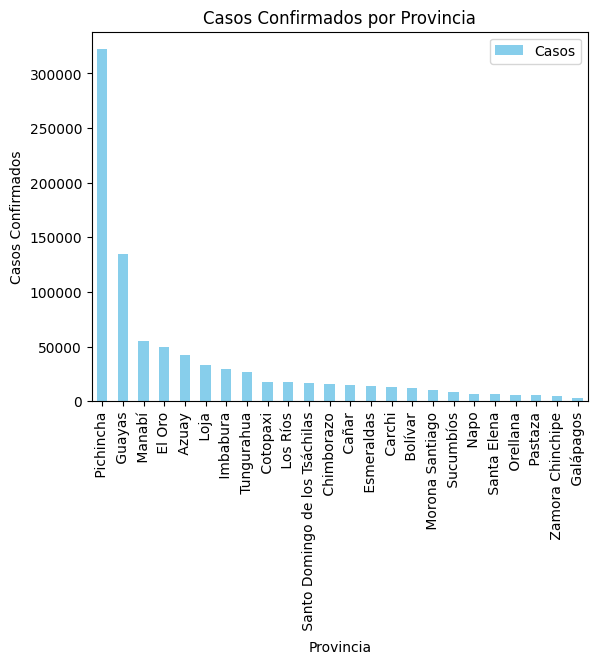

In [49]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde tu dispositivo
from google.colab import files
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_name)

# Convertir la columna 'Casos' a string y limpiarla
df['Casos'] = df['Casos'].astype(str).str.replace(' ', '').astype(int)

# Visualizar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Estadísticas básicas
summary_stats = df.describe()

# Mostrar estadísticas básicas
print("\nEstadísticas básicas:")
print(summary_stats)

# Provincias con más casos confirmados
top_provincias = df.nlargest(3, 'Casos')[['Provincias', 'Casos']]
print("\nProvincias con más casos confirmados:")
print(top_provincias)

# Provincias con menos casos confirmados
bottom_provincias = df.nsmallest(3, 'Casos')[['Provincias', 'Casos']]
print("\nProvincias con menos casos confirmados:")
print(bottom_provincias)

# Gráfico de barras para visualizar casos confirmados por provincia
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='Provincias', y='Casos', color='skyblue')
plt.title('Casos Confirmados por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Casos Confirmados')
plt.show()
